In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [42]:
yolo = cv2.dnn.readNet("/yolov3-tiny.weights", "/yolov3-tiny.cfg")

In [43]:
classes = []

with open("/coco.names", 'r') as f:
    classes = f.read().splitlines()

In [44]:
len(classes)

80

In [45]:
img = cv2.imread("/giraffe.jpg")

blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop = False)

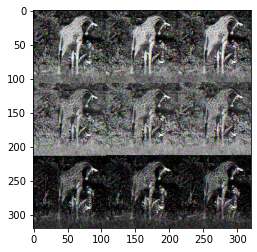

In [46]:
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [47]:
yolo.setInput(blob)

In [48]:
output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)

In [49]:
boxes = []
confidences = []
class_ids = []

width = img.shape[1]
height = img.shape[0]

for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w = int(detection[0]*width)
      h = int(detection[0]*height)

      x = int(center_x- w/2)
      y = int(center_y- h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id) 

In [50]:
len(boxes)

2

In [51]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [52]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes),3) )

In [53]:
if len(indexes) > 0:

  for i in indexes.flatten():
    x,y,w,h = boxes[i]

    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]

    cv2.rectangle(img, (x,y), (x+w, y+h), color, 1)
    cv2.putText(img, label +" "+confi, (x,y+20), font, 2, (255,255,255), 1)

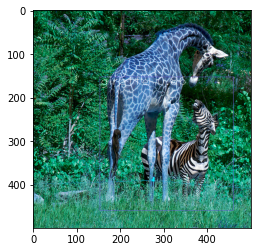

In [54]:
plt.imshow(img)

In [57]:
cv2.imwrite("/image.jpeg", img)

True